# Módulo 2: Despliegue de datos y estadísticas básicas

# Librerías

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px

import warnings
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

# Carga de archivos

In [2]:
DH = pd.read_csv('db_mineralogia.csv', sep=',')
DH

,East,North,Elevation,bo,cpy,py,alte,mine,dom
0,156911.7393,93193.44188,3827.13,0.000,0.564,1.199,8,3,3
1,156908.3362,93214.70964,3768.98,0.019,0.671,3.247,8,3,3
2,156905.6440,93233.72129,3712.19,0.097,0.582,1.035,8,4,3
3,156903.2416,93252.82611,3653.51,0.193,0.487,0.780,8,3,3
4,156901.0979,93270.77183,3598.07,0.058,1.036,2.730,8,3,3
...,...,...,...,...,...,...,...,...,...
1270,156988.2447,92051.49218,2849.81,0.039,0.947,0.063,8,3,3
1271,157005.5199,92071.95481,2753.56,0.001,1.000,0.272,8,3,3
1272,156214.7871,91746.89044,3249.31,0.019,0.740,7.601,1,3,3
1273,156214.4738,91738.09338,3047.85,0.001,1.139,7.086,5,3,3


# Visualización de datos (DH)

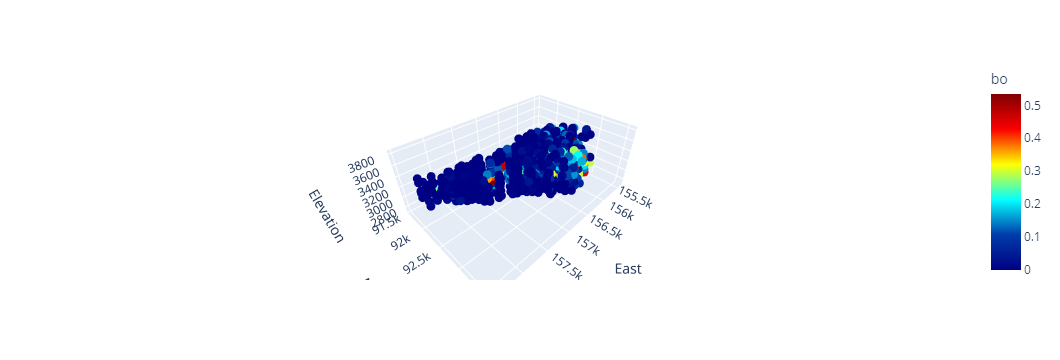

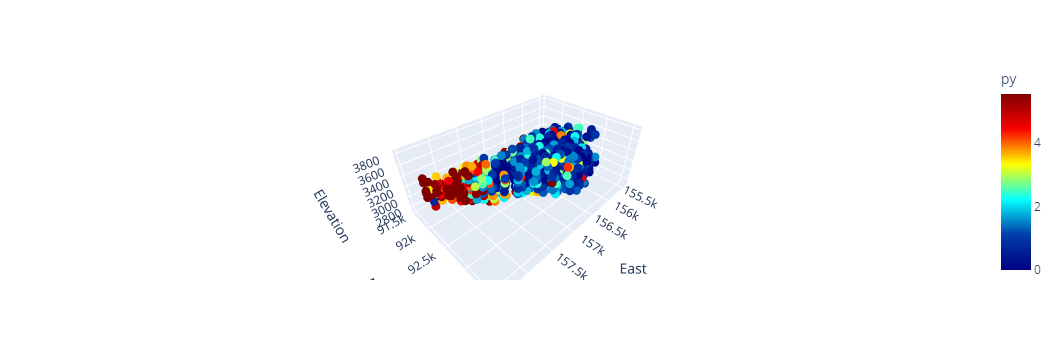

In [8]:
continuous = 'bo'
fig = px.scatter_3d(DH, x='East', y='North', z='Elevation', color=continuous, color_continuous_scale=px.colors.sequential.Jet, range_color=[0.0, DH[continuous].quantile(0.95)])
fig.update_traces(marker=dict(size=5.0))
fig.show()
continuous = 'py'
fig = px.scatter_3d(DH, x='East', y='North', z='Elevation', color=continuous, color_continuous_scale=px.colors.sequential.Jet, range_color=[0.0, DH[continuous].quantile(0.95)])
fig.update_traces(marker=dict(size=5.0))
fig.show()

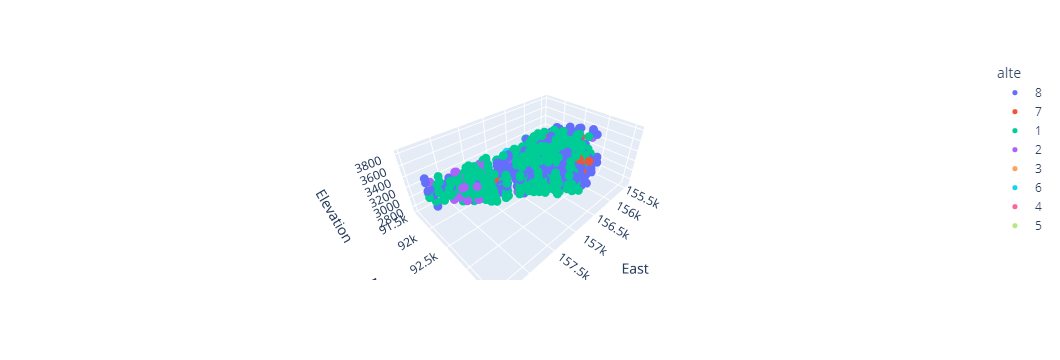

In [29]:
categorical = 'alte'
DH[categorical] = DH[categorical].astype(str)
fig = px.scatter_3d(DH, x='East', y='North', z='Elevation', color=categorical)
fig.update_traces(marker=dict(size=5.0))
fig.show()

# Estadísticas Básicas

In [30]:
DH.describe()

,East,North,Elevation,bo,cpy,py,mine,dom
count,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000
mean,156842.761676,92566.381963,3340.410173,0.140922,1.073958,1.344159,3.264314,2.814118
std,653.918638,424.794056,250.859647,0.190800,0.561443,1.987731,0.470417,0.397150
min,155448.723300,91561.040080,2703.210000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,156390.579000,92203.212280,3190.550000,0.001500,0.715500,0.178000,3.000000,3.000000
50%,156764.985500,92553.968930,3359.160000,0.058000,0.990000,0.606000,3.000000,3.000000
75%,157241.014150,92879.356230,3538.835000,0.215000,1.278500,1.618500,4.000000,3.000000
max,158454.743200,93569.020530,3827.690000,1.661000,6.849000,16.520000,4.000000,3.000000


In [31]:
DH['bo'][DH['bo'] <= 0] = np.nan
DH['cpy'][DH['cpy'] <= 0] = np.nan
DH['py'][DH['py'] <= 0] = np.nan

In [32]:
DH.describe()

,East,North,Elevation,bo,cpy,py,mine,dom
count,1275.000000,1275.000000,1275.000000,1028.000000,1274.000000,1274.000000,1275.000000,1275.000000
mean,156842.761676,92566.381963,3340.410173,0.174781,1.074801,1.345214,3.264314,2.814118
std,653.918638,424.794056,250.859647,0.198082,0.560856,1.988154,0.470417,0.397150
min,155448.723300,91561.040080,2703.210000,0.001000,0.083000,0.002000,1.000000,1.000000
25%,156390.579000,92203.212280,3190.550000,0.015000,0.716000,0.178000,3.000000,3.000000
50%,156764.985500,92553.968930,3359.160000,0.105000,0.990000,0.606500,3.000000,3.000000
75%,157241.014150,92879.356230,3538.835000,0.272500,1.278750,1.618750,4.000000,3.000000
max,158454.743200,93569.020530,3827.690000,1.661000,6.849000,16.520000,4.000000,3.000000


In [33]:
DH.describe()[['bo','cpy','py']].T

,count,mean,std,min,25%,50%,75%,max
bo,1028.0,0.174781,0.198082,0.001,0.015,0.1050,0.27250,1.661
cpy,1274.0,1.074801,0.560856,0.083,0.716,0.9900,1.27875,6.849
py,1274.0,1.345214,1.988154,0.002,0.178,0.6065,1.61875,16.520


In [34]:
stats = DH.describe().T
stats['IQR'] = stats['75%'] - stats['25%']
stats['95%'] = DH.quantile(0.95)
stats

,count,mean,std,min,25%,50%,75%,max,IQR,95%
East,1275.0,156842.761676,653.918638,155448.72330,156390.57900,156764.98550,157241.01415,158454.74320,850.43515,158057.117610
North,1275.0,92566.381963,424.794056,91561.04008,92203.21228,92553.96893,92879.35623,93569.02053,676.14395,93330.053921
Elevation,1275.0,3340.410173,250.859647,2703.21000,3190.55000,3359.16000,3538.83500,3827.69000,348.28500,3712.630000
bo,1028.0,0.174781,0.198082,0.00100,0.01500,0.10500,0.27250,1.66100,0.25750,0.575600
cpy,1274.0,1.074801,0.560856,0.08300,0.71600,0.99000,1.27875,6.84900,0.56275,1.995150
py,1274.0,1.345214,1.988154,0.00200,0.17800,0.60650,1.61875,16.52000,1.44075,5.551100
mine,1275.0,3.264314,0.470417,1.00000,3.00000,3.00000,4.00000,4.00000,1.00000,4.000000
dom,1275.0,2.814118,0.397150,1.00000,3.00000,3.00000,3.00000,3.00000,0.00000,3.000000


In [35]:
stats.to_csv('stats.csv')

In [36]:
DH.to_csv('DH.csv', index=False)